In [61]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
print(sklearn.__version__)

1.0.1


In [47]:
df = pd.read_csv('data/races_data.csv',sep='~')

In [48]:
df.head()

,edition,year,distance,avg_speed,longest_stage,shortest_stage,race
0,105,2022,3450,39.870,204.0,147.0,giro
1,104,2021,3411,39.528,231.0,139.0,giro
2,103,2020,3361,39.230,229.0,124.0,giro
3,102,2019,3547,39.396,239.0,131.0,giro
4,101,2018,3572,40.114,244.0,115.0,giro


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edition         1520 non-null   int64  
 1   year            1520 non-null   int64  
 2   distance        1520 non-null   int64  
 3   avg_speed       1464 non-null   float64
 4   longest_stage   1520 non-null   float64
 5   shortest_stage  1520 non-null   float64
 6   race            1520 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 83.2+ KB


In [50]:
df_cluster = df.copy()
#Drop rows with empty data
df_cluster.dropna(inplace=True)

In [51]:
df_cluster.head()

,edition,year,distance,avg_speed,longest_stage,shortest_stage,race
0,105,2022,3450,39.870,204.0,147.0,giro
1,104,2021,3411,39.528,231.0,139.0,giro
2,103,2020,3361,39.230,229.0,124.0,giro
3,102,2019,3547,39.396,239.0,131.0,giro
4,101,2018,3572,40.114,244.0,115.0,giro


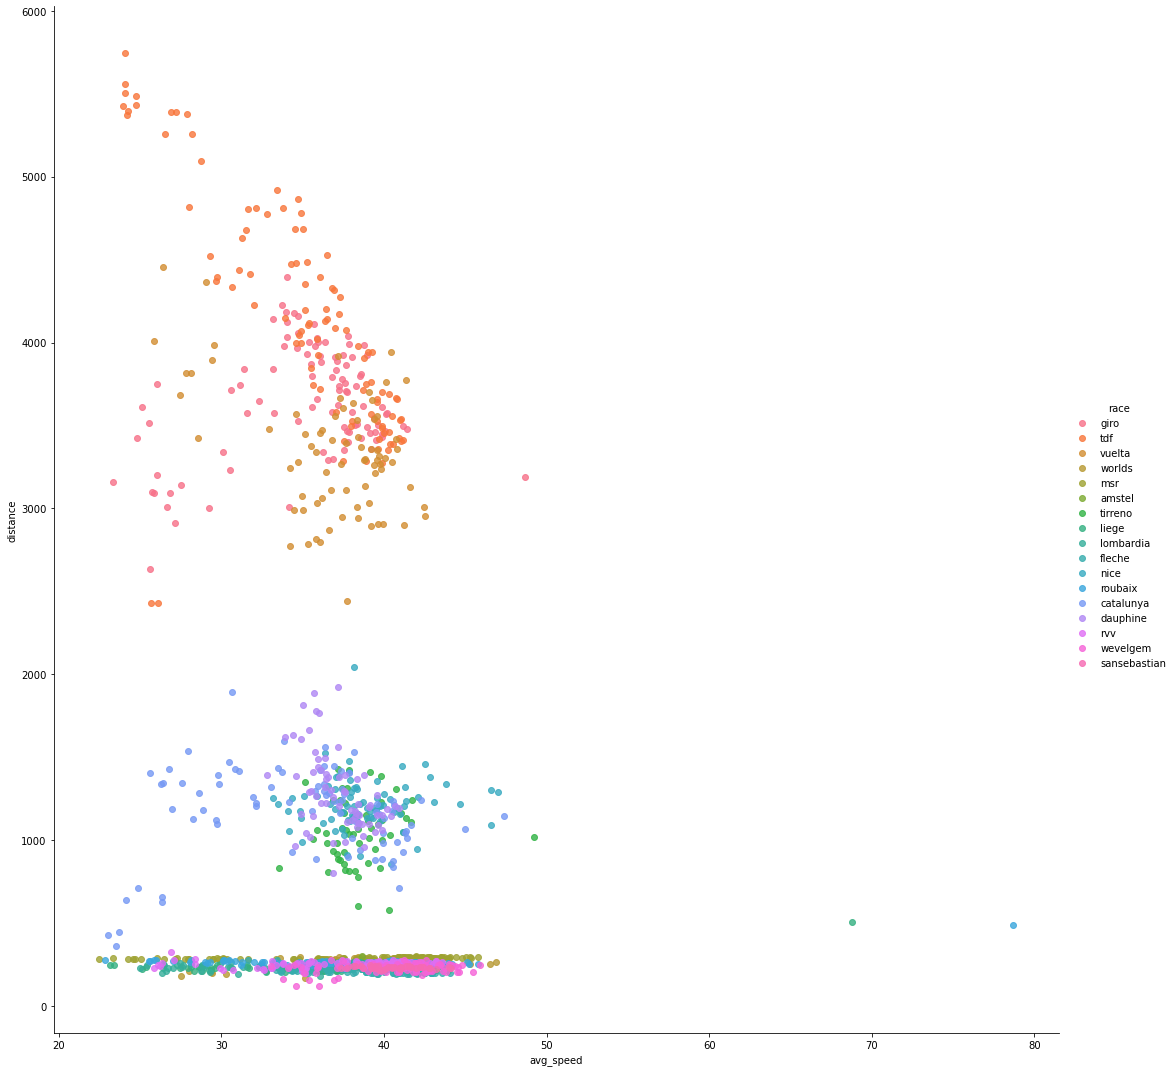

In [65]:
import seaborn as sns
sns.lmplot('avg_speed', 'distance', data=df_cluster[['distance','avg_speed','race']], hue='race', fit_reg=False, height=15)

plt.show()

In [52]:
# Data for various clustering algorithms

#X = np.array(df_cluster_label)
X = np.array(df_cluster[['avg_speed','distance']])

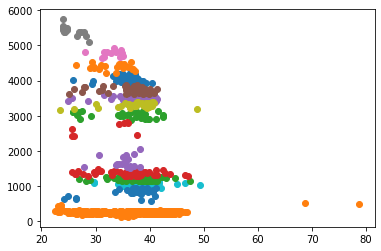

In [53]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# define the model
model = AffinityPropagation(damping=0.8)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

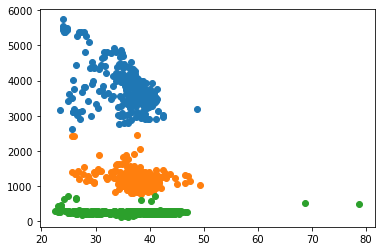

In [54]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=3)

# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

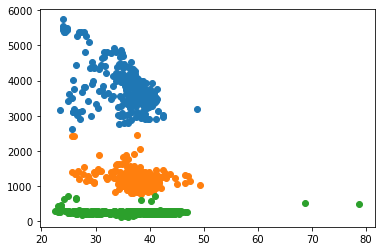

In [55]:
#BIRCH - BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies
from numpy import unique
from numpy import where
from sklearn.cluster import Birch
from matplotlib import pyplot

# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

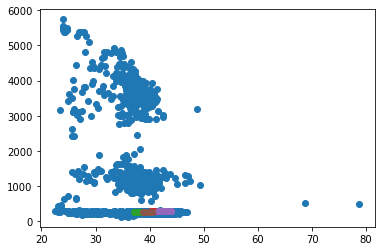

In [56]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.90, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

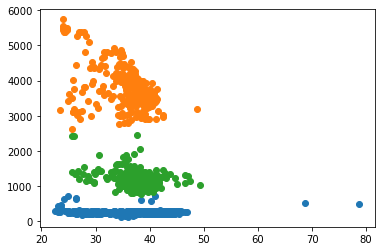

In [57]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from matplotlib import pyplot

# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

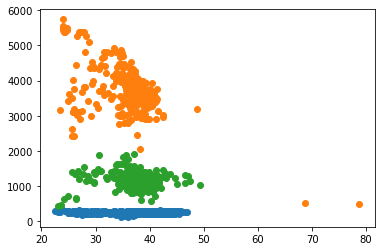

In [58]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()